DI Her: Misaligned Binary
============================

In this example, we'll reproduce Figure 8 in the misalignment release paper (Horvat et al. 2018).

Setup
-----------------------------


Let's first make sure we have the latest version of PHOEBE 2.1 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [ ]:
!pip install -I "phoebe>=2.1,<2.2"

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger('error')

b = phoebe.default_binary()

System Parameters
------------

We'll adopt and set parameters from the following sources:
   * Albrecht et al. (2009), Nature: https://arxiv.org/pdf/0909.2861
   * https://en.wikipedia.org/wiki/DI_Herculis
   * Claret et al (2010) https://arxiv.org/pdf/1002.2949.pdf

In [3]:
Nt = 2000

b.set_value('t0_supconj@orbit', 2442233.3481)
b.set_value('vgamma@system', 9.1)    # [km/s] (Albrecht et al. 2009) 
b.set_value('ntriangles@primary', Nt)
b.set_value('ntriangles@secondary', Nt)

mass1 = 5.1                           # [M_sun] (Albrecht et al. 2009)
mass2 = 4.4                           # [M_sun] (Albrecht et al. 2009)

P = 10.550164                         # [d] (Albrecht et al. 2009)
mu_sun = 1.32712440018e20             # = G M_sun [m3 s^-2], Wiki Standard_gravitational_parameter
R_sun = 695700000                     # [m] Wiki Sun

sma = (mu_sun*(mass1 + mass2)*(P*86400/(2*np.pi))**2)**(1./3)/R_sun   # Kepler equation

incl = 89.3                           # deg (Albrecht et al. 2009)
vp_sini = 109                         # [km/s] (Albrecht et al. 2009)
vs_sini = 117                         # [km/s] (Albrecht et al. 2009)

Rp = 2.68                             # [R_sun] (Albrecht et al. 2009)
Rs = 2.48                             # [R_sun] (Albrecht et al. 2009) 
   
sini = np.sin(np.pi*incl/180)

vp = vp_sini*86400/sini               # [km/s]
vs = vs_sini*86400/sini               # [km/s]

Pp = 2*np.pi*Rp*R_sun/1000/vp
Ps = 2*np.pi*Rs*R_sun/1000/vs

Fp = P/Pp
Fs = P/Ps

b.set_value('q', mass2/mass1)
b.set_value('incl@binary', incl)      # (Albrecht et al. 2009)
b.set_value('sma@binary', sma)        # calculated
b.set_value('ecc@binary', 0.489)      # (Albrecht et al. 2009)

b.set_value('per0@binary', 330.2)     # (Albrecht et al. 2009)
b.set_value('period@binary', P)       # calculated

b.set_value('syncpar@primary', Fp)    # calculated
b.set_value('syncpar@secondary', Fs)  # calculated

b.set_value('requiv@primary', Rp)      # !!! requiv (Albrecht et al. 2009)
b.set_value('requiv@secondary', Rs)    # !!! requiv (Albrecht et al. 2009)

b.set_value('teff@primary', 17300)    # Wiki DI_Herculis
b.set_value('teff@secondary', 15400)  # Wiki DI_Herculis
    
b.set_value('gravb_bol@primary', 1.)
b.set_value('gravb_bol@secondary', 1.)


# beta = 72 deg (Albrecht et al. 2009)
dOmega_p = 72
di_p = 62  - incl
b.set_value('pitch@primary', di_p) # di
b.set_value('yaw@primary', dOmega_p) # dOmega

# beta = - 84 deg (Albrecht et al. 2009)
dOmega_s = -84
di_s = 100 - incl
b.set_value('pitch@secondary', di_s) # di
b.set_value('yaw@secondary', dOmega_s) # dOmega
  
b.set_value_all('atm','extern_planckint')
b.set_value_all('irrad_method', 'none')


Datasets
---------------

Let's compute an LC and RV dataset sampled at 200 points in phase (with some aliasing).

In [4]:
n = 200
times = b.to_time(np.linspace(-0.05, 1.05, n))

b.add_dataset('lc', times=times, dataset='lc01', ld_func='logarithmic', ld_coeffs = [0.5,0.5])
b.add_dataset('rv', times=times, dataset='rv01', ld_func='logarithmic', ld_coeffs = [0.5,0.5])

<ParameterSet: 17 parameters | contexts: compute, dataset>

Compute
--------------

In [5]:
b.run_compute(ltte=False)

<ParameterSet: 6 parameters | kinds: rv, lc>

Plotting
-------------

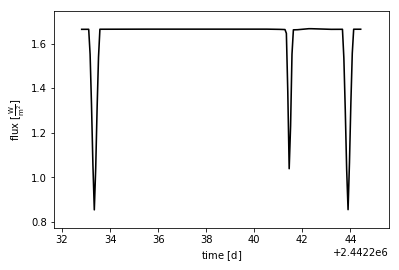

In [6]:
afig, mplfig = b.plot(kind='lc', show=True)

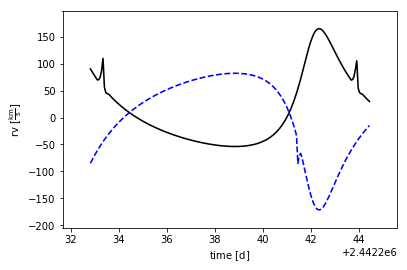

In [7]:
afig, mplfig = b.plot(kind='rv', show=True)